In [1]:
#install xgboost library
!pip install xgboost -q #-q is for silent installation

In [29]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
#importing three classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [30]:
#load iris dataset
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


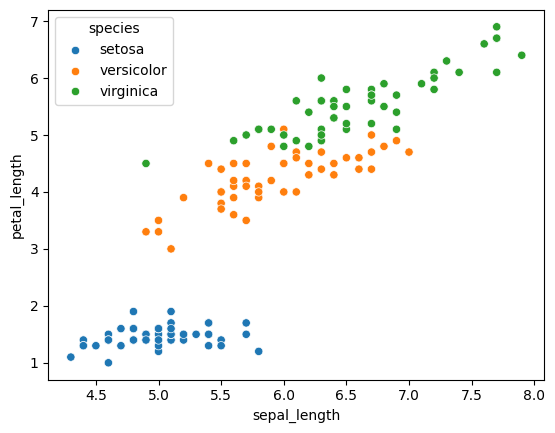

In [31]:
#plotting scatter plot
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')
plt.show()


In [32]:
#split the dataset into X and y
X=df.drop('species', axis=1)
y=df['species']

#label encoding
le=LabelEncoder()
y=le.fit_transform(y)

#split the dataset into train and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
%%time
#train the model desicion tree
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

#predict the model
y_pred=dt.predict(X_test)

#evaluate the model accuracy, precision, recall, f1 score
print('accuracy score:', accuracy_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred, average='micro'))
print('recall score:', recall_score(y_test, y_pred, average='micro'))
print('f1 score:', f1_score(y_test, y_pred, average='micro'))

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0
CPU times: total: 31.2 ms
Wall time: 29.7 ms


In [34]:
%%time
#train the model random forest
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

#predict the model
y_pred=rf.predict(X_test)

#evaluate the model accuracy, precision, recall, f1 score
# Evaluate the model accuracy, precision, recall, and f1 score
print('accuracy score:', accuracy_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred, average='micro'))
print('recall score:', recall_score(y_test, y_pred, average='micro'))
print('f1 score:', f1_score(y_test, y_pred, average='micro'))

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0
CPU times: total: 406 ms
Wall time: 653 ms


In [37]:
%%time
#now XGboost model
#train the model
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

#predict the model
y_pred=xgb.predict(X_test)

#evaluate the model accuracy, precision, recall, f1 score
# Evaluate the model accuracy, precision, recall, and f1 score
print('accuracy score:', accuracy_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred, average='micro'))
print('recall score:', recall_score(y_test, y_pred, average='micro'))
print('f1 score:', f1_score(y_test, y_pred, average='micro'))

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0
CPU times: total: 156 ms
Wall time: 195 ms


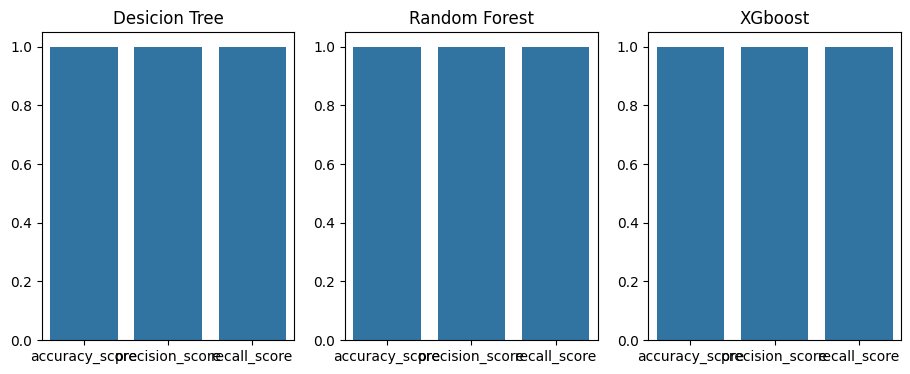

In [43]:
#now make a bar plot shhowing each of the matrix with respect to the model
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.barplot(x=['accuracy_score', 'precision_score', 'recall_score'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro')])
plt.title('Desicion Tree')

plt.subplot(1,4,2)
sns.barplot(x=['accuracy_score', 'precision_score', 'recall_score'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')

plt.subplot(1,4,3)
sns.barplot(x=['accuracy_score', 'precision_score', 'recall_score'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro')])
plt.title('XGboost')

plt.show()

